In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('who_covid_full_data.csv', sep = ',')
recent_data = data[(data['location']!='World') & (data['date'] == '2020-03-10') ]

In [3]:
print(stats.shapiro(recent_data['total_cases']))

(0.1093950867652893, 6.63944843988137e-23)


pvalue < 0.05, значит гипотезу о нормальности отвергаем

In [4]:
print(recent_data['total_cases'].mean(), recent_data['total_cases'].var())

1024.3423423423424 60272434.299918234


Среднее и Выборочная дисперсия по дню


Теперь исследуем по стране 


In [5]:
data = pd.read_csv('who_covid_full_data.csv', sep = ',')
data2 = data[data['location'] == 'Iraq']
new_data = data2[(pd.notnull(data2['new_cases']))&(pd.notnull(data2['new_deaths']))]['new_cases'] 
ndead_data = data2[(pd.notnull(data2['new_cases']))&(pd.notnull(data2['new_deaths']))]['new_deaths'] 
nd = np.array(new_data)
ndd = np.array(ndead_data)

print(stats.shapiro(data2['total_cases']))
print(data2['total_cases'].mean(), data2['total_cases'].var())
print(nd.mean(),nd.var())
print(nd.mean(),ndd.var())

(0.9283499121665955, 0.14352193474769592)
39.7 863.3789473684211
5.7 48.61
5.7 0.8099999999999999


Гипотезу о нормальности всех случаев в Ираке принимаем

In [6]:
print(stats.shapiro(nd))

(0.7900519371032715, 0.010973377153277397)


Гипотезу о том, что новые заражения распределены нормально отвергаем.


In [7]:
print(stats.shapiro(ndd))

(0.685775637626648, 0.0005925917066633701)


Гипотезу о том, что новые смерти распределены нормально, отвергаем

Спирман:

In [8]:
spear = stats.spearmanr(nd, ndd)
print(spear.correlation, spear.pvalue)

0.6368525395992861 0.04768675287136872


Гипотезу о некоррелированности отвергаем.

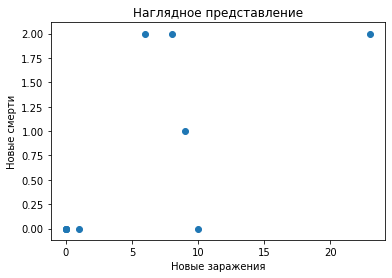

In [9]:
fig, gph = plt.subplots()
gph.scatter(nd, ndd)
gph.set_title('Наглядное представление')
gph.set_ylabel('Новые смерти')
gph.set_xlabel('Новые заражения')
plt.show()

Парный Спирман: 

In [10]:
spear = stats.spearmanr(nd[1:] - nd[:-1], ndd[1:] - ndd[:-1])
print(spear.correlation, spear.pvalue) 


0.6210590034081188 0.07425299207352293


pvalue > 0.05, Гипотеза принимается

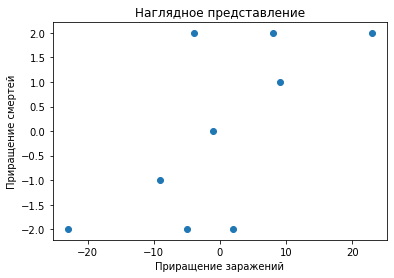

In [11]:
fig, gph = plt.subplots()
gph.scatter(nd[1:] - nd[:-1], ndd[1:] - ndd[:-1])
gph.set_title('Наглядное представление')
gph.set_ylabel('Приращение смертей')
gph.set_xlabel('Приращение заражений')
plt.show() #график

Если приращения > 3 (больше 10, как в примере не могу смотреть, так как для Ирака там получается только одно число = 23)

In [12]:
x = nd[1:] - nd[:-1]
y = x[x>3]

In [13]:
print(stats.shapiro(y))

(0.799763023853302, 0.11393163353204727)


Гипотезу о нормальности принимаем